# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 1), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 1.61 MiB | 9.27 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

# Step 1

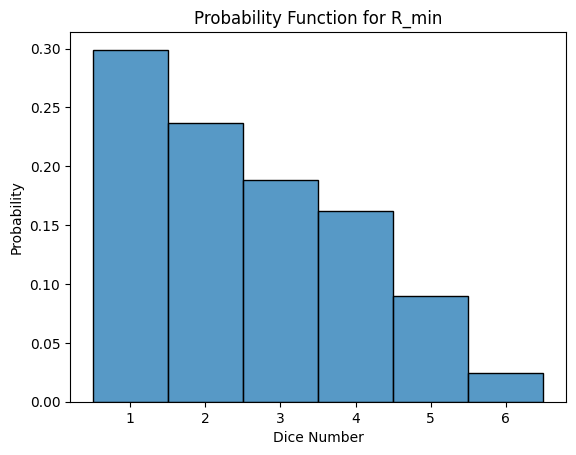

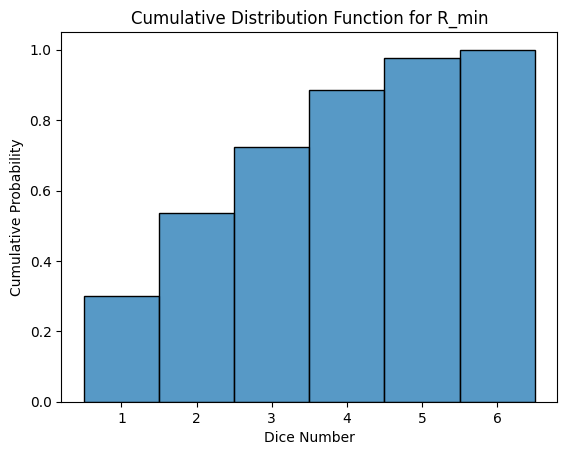

In [11]:
#rolling two dice
num_simulations = 1000
results = np.random.randint(1, 7, size=(num_simulations, 2))
R_min = np.min(results, axis=1)

#probability function
sns.histplot(R_min, bins=np.arange(0.5, 7.5, 1), stat="density")
plt.title("Probability Function for R_min")
plt.xlabel("Dice Number")
plt.ylabel("Probability")
plt.show()

#cumulative distribution function
sns.histplot(R_min, bins=np.arange(0.5, 7.5, 1), stat="density", cumulative=True)
plt.title("Cumulative Distribution Function for R_min")
plt.xlabel("Dice Number")
plt.ylabel("Cumulative Probability")
plt.show()

#Step 2

Expected Value (E[R_med]): 3.50709


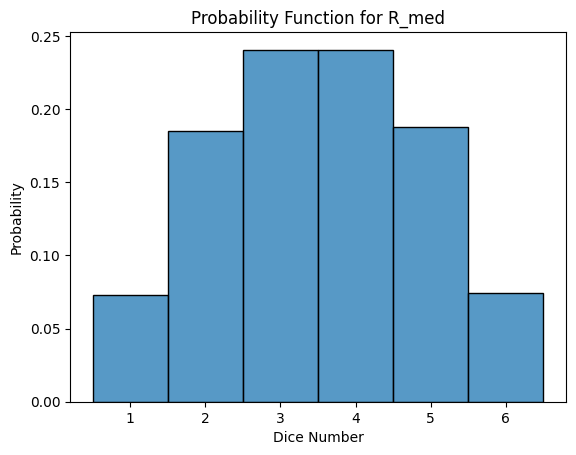

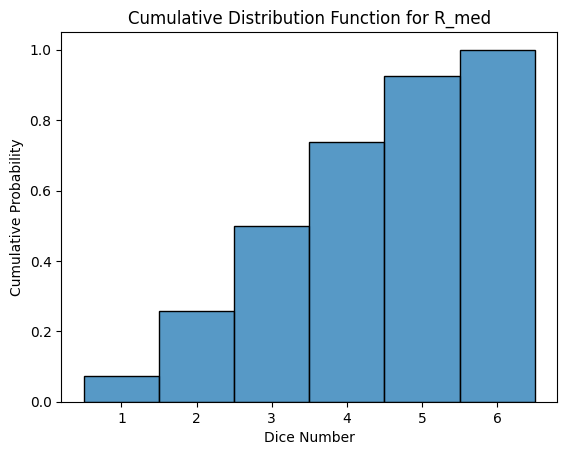

In [10]:
#rolling three dice
num_simulations = 100000
results = np.random.randint(1, 7, size=(num_simulations, 3))
R_med = np.sort(results, axis=1)[:, 1]  # Extract middle values

#expected value
E_R_med = np.mean(R_med)
print("Expected Value (E[R_med]):", E_R_med)

#probability function
sns.histplot(R_med, bins=np.arange(0.5, 7.5, 1), stat="density")
plt.title("Probability Function for R_med")
plt.xlabel("Dice Number")
plt.ylabel("Probability")
plt.show()

#cumulative distribution function
sns.histplot(R_med, bins=np.arange(0.5, 7.5, 1), stat="density", cumulative=True)
plt.title("Cumulative Distribution Function for R_med")
plt.xlabel("Dice Number")
plt.ylabel("Cumulative Probability")
plt.show()


#Step 3

Expected Value (E[Z]): 17.44188


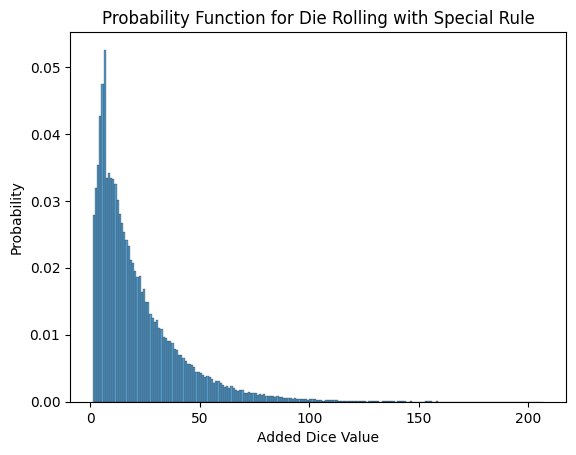

In [16]:
#rolling die
num_simulations = 100000
total_values = []

for n in range(num_simulations):
    total = 0
    while np.random.randint(1, 7) != 6:
        total += np.random.randint(1, 7)
    total_values.append(total)

#calculate expected value
E_Z = np.mean(total_values)
print("Expected Value (E[Z]):", E_Z)

#probability function
sns.histplot(total_values, bins=np.arange(1, max(total_values) + 2, 1), stat="density")
plt.title("Probability Function for Die Rolling with Special Rule")
plt.xlabel("Added Dice Value")
plt.ylabel("Probability")
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [17]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

1. Cross tabulate treatment and breast_cancer_death. What is the difference in 25-year survival rates between the control and mammogram groups?

In [22]:
ct = pd.crosstab(df.treatment, df.breast_cancer_death)
print(ct, '\n')

control_survival_rate = ct.loc['control','no']/ct.loc['control'].sum()
mammogram_survival_rate = ct.loc['mammogram','no']/ct.loc['mammogram'].sum()
diff = mammogram_survival_rate - control_survival_rate

print("Difference in 25-year survival rates between control and mammogram groups: ", diff)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

Difference in 25-year survival rates between control and mammogram groups:  0.00011505110015985753


2. Bootstrap the densities and distributions of survival rates for the two groups.

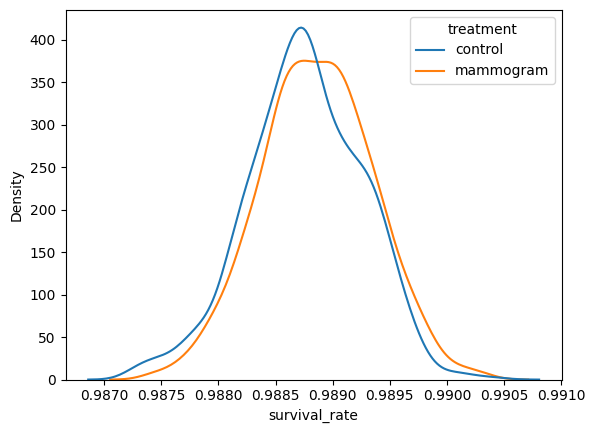

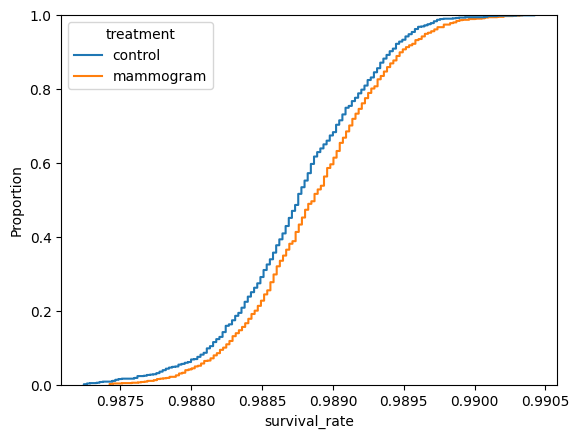

In [28]:
S = 1000
rate_control = np.zeros(S)
rate_mammogram = np.zeros(S)

#bootstrap
for s in range(S):
    control_sample = df[df.treatment == 'control'].sample(ct.loc['control'].sum(), replace=True)
    mammogram_sample = df[df.treatment == 'mammogram'].sample(ct.loc['mammogram'].sum(), replace=True)

    rate_control[s] = control_sample.breast_cancer_death.value_counts(normalize=True)[0]
    rate_mammogram[s] = mammogram_sample.breast_cancer_death.value_counts(normalize=True)[0]

#create df for plotting
rdf_control = pd.DataFrame({'treatment': 'control', 'survival_rate': rate_control})
rdf_mammogram = pd.DataFrame({'treatment': 'mammogram', 'survival_rate': rate_mammogram})
rdf = pd.concat([rdf_control, rdf_mammogram], axis=0)

#density plot
sns.kdeplot(data=rdf, x='survival_rate', hue='treatment')
plt.show()

#ECDF plot
sns.ecdfplot(data=rdf, x='survival_rate', hue='treatment')
plt.show()


3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?




In [30]:
diff_survival_rates = rate_mammogram - rate_control

#99% confidence interval
conf_interval = np.percentile(diff_survival_rates, [0.5, 99.5])
print("99% Confidence Interval for Difference in Survival Rates:", conf_interval)

#includes 0?
includes_zero = (conf_interval[0] <= 0 <= conf_interval[1])
print("Confidence Interval includes 0?", includes_zero)


99% Confidence Interval for Difference in Survival Rates: [-0.0016667   0.00200796]
Does the Confidence Interval include zero? True


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

The reasons that the data might be inaccurate is because there is very limited information presented in this particular database. For example, patient's ife habits, smoking or not and other factors could play a large role in determining if the conclusion is accurate.

ChatGPT was used in aid of this assignment